# Predict shoping intention with machine learning from google analytics data 

Dataset was collected from UCI machine learning repositories (https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) 

*Data Set Information*:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.


*Attribute*:

The dataset consists of 10 numerical and 8 categorical attributes.
*The 'Revenue'* attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

*The "Bounce Rate", "Exit Rate" and "Page Value"* features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
        -The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
         - The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
         - The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
         - The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [1]:
#!pip install seaborn
#!brew install lightgbm
#!brew install libomp
#!pip install lightgbm
#!conda install -c conda-forge imbalanced-learn -y
#!pip install imbalanced-learn
#!conda install -c conda-forge imbalanced-learn -y
#!conda install nb_conda
#!pip install -U geometric-smote

### Data Exploration

In [2]:
#import of all the libraries that we will need throughout the process
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import auc
from numpy import arange
from numpy import argmax
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform 
import lightgbm as lab
from sklearn.metrics import average_precision_score, precision_recall_curve#
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform 
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from gsmote import GeometricSMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap 
from mlxtend.plotting import plot_decision_regions

#Avoid unncecessry warning
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# open file
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Text(0.89, 2100, '1908')

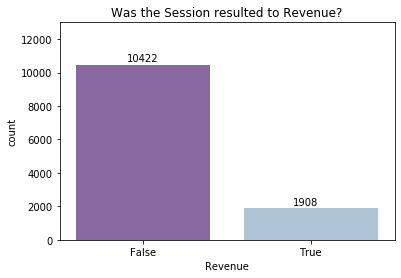

In [4]:
# plot of our output variable
revenue_plot = sns.countplot(df['Revenue'],  palette = "BuPu_r").set(title='Was the Session resulted to Revenue?')
plt.ylim(0,13000)
plt.text(x=-.100, y=10700 ,s=df['Revenue'].value_counts()[0])
plt.text(x=.890, y=2100, s=df['Revenue'].value_counts()[1])

*Observation*:
- the majority of the online session did not result to a purchase from the customer. Specifically, out of all 12330 online sessions, only 1908 were successfull as to generating revenue
- indicates class imbalanc scenario which could introduce bias towards the majority class when ml model will be created

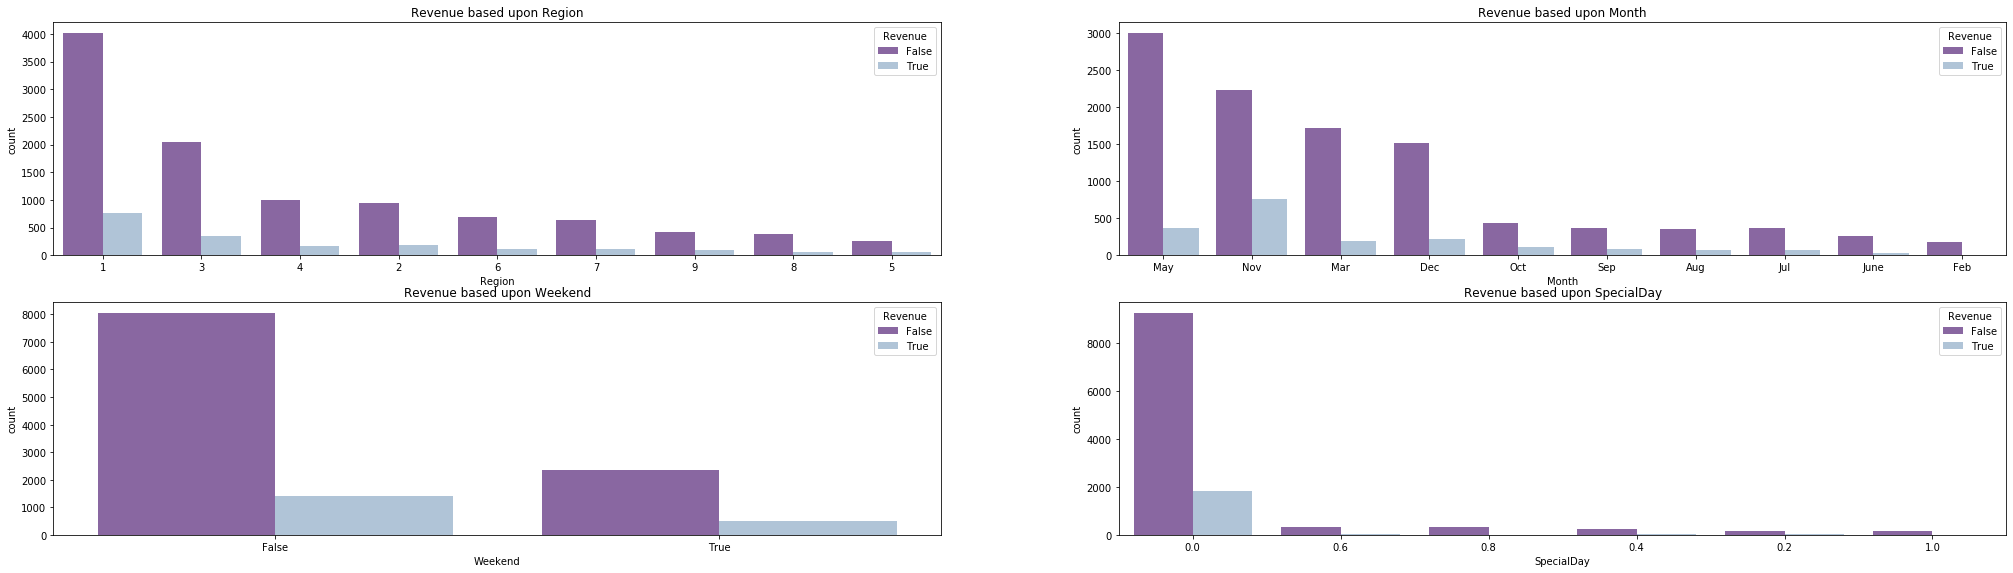

In [5]:
# figures regional and time-related features against revenue
features =['Region','Month','Weekend','SpecialDay']  
plt.figure(figsize=(35,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 2, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "BuPu_r")
    ax.set_title('Revenue based upon'+ " " + feature)
    #plt.tight_layout()

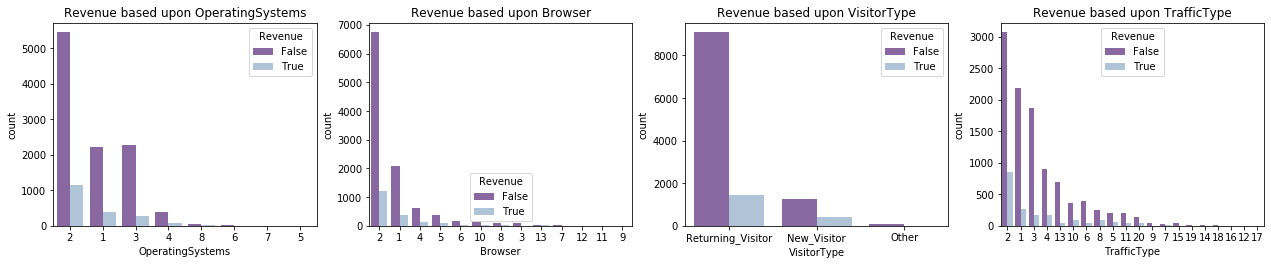

In [6]:
#figures on how user-system attributes affect revenue
features=['OperatingSystems','Browser','VisitorType', 'TrafficType']    
plt.figure(figsize=(50,80))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(18, 9, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "BuPu_r")
    ax.set_title('Revenue based upon'+ " " + feature)
    #plt.tight_layout()

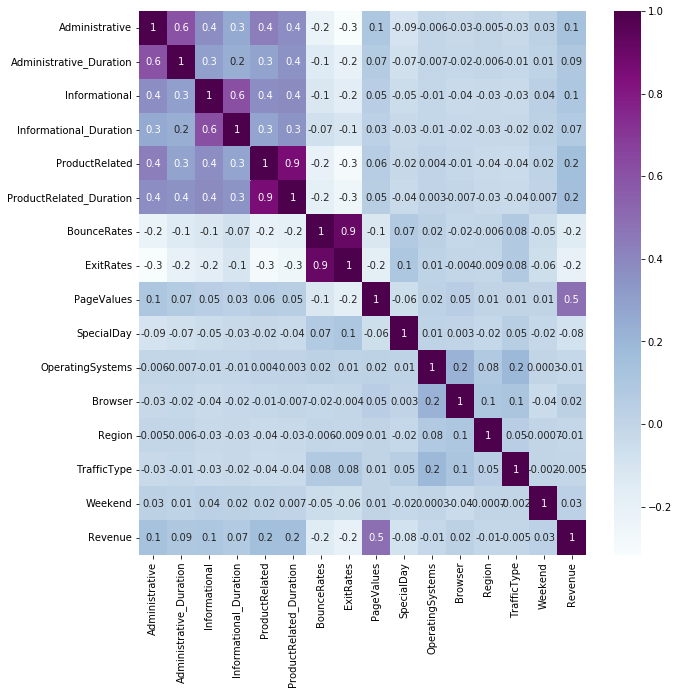

In [7]:
# bivariate correlations for all our columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='BuPu')

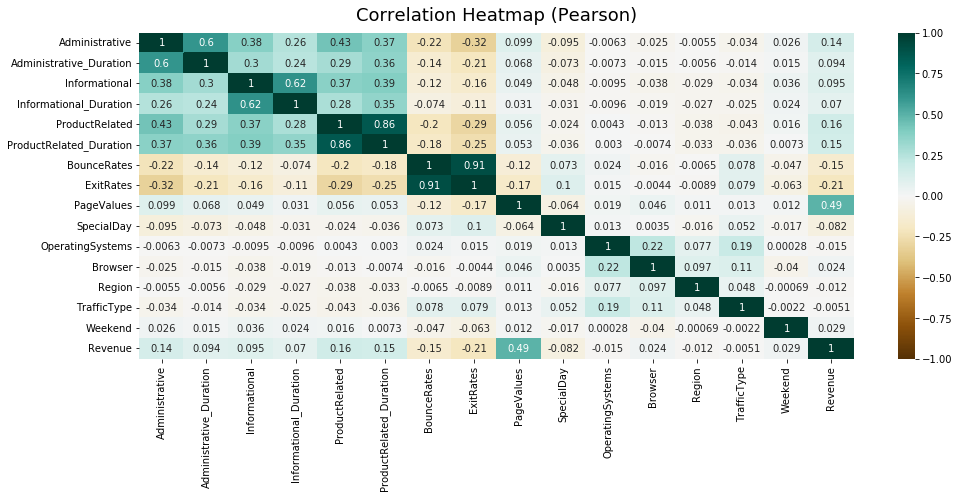

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method ='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap (Pearson)', fontdict={'fontsize':18}, pad=12);

*Observation*:
- Revenue is highly positively correlated with the average number of pagevalues feature (r =0.5), while it is inversely correlated with Bounce and Exit Rates.
- from the administrative, informational and product-related pages, the one generating the biggest Revenue is the number of product-related pages visited by the user(r = 0.2).

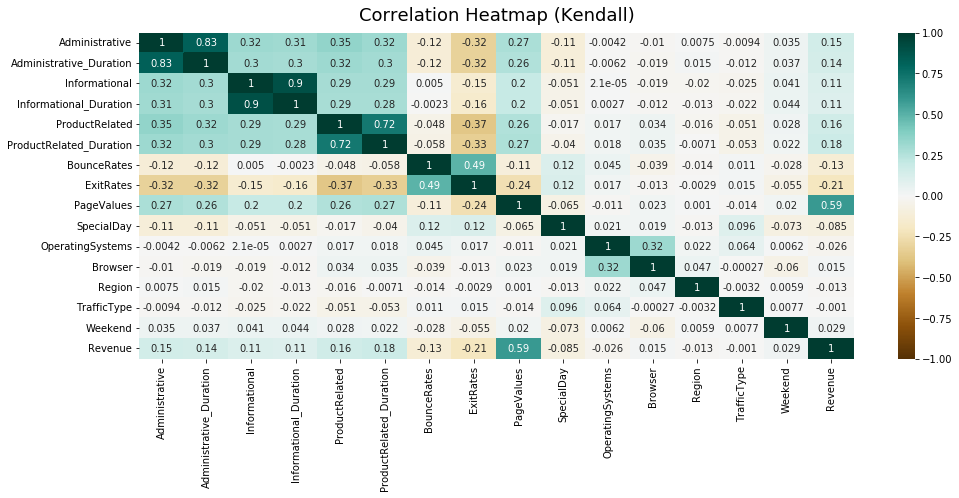

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method ='kendall'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap (Kendall)', fontdict={'fontsize':18}, pad=12);

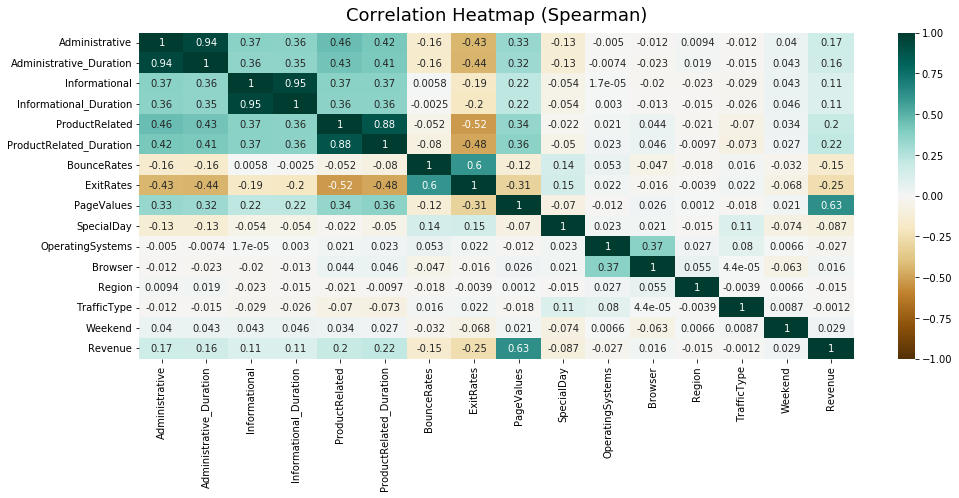

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method ='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap (Spearman)', fontdict={'fontsize':18}, pad=12);

# Data Preprocessing

First we will split the train from the test set so that we can preprocess them separately to avoid data leakage to our test sample.

In [11]:
#extract our outcome variable
y = df['Revenue']

#drop y feature from our predictors set
X = df.drop('Revenue',1)

# encode y column vector
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

#split the sample to train and test to proceed with preprocessing to both of them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.172,stratify=y, random_state=123, shuffle=True)

# Feature Engineering:


### Potential Revenue Indicators in Numerical features:

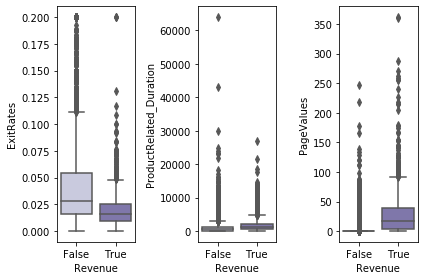

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
#plt.figure(figsize=(10,))

sns.boxplot(x='Revenue', y='ExitRates', data=df, ax=ax1,  palette = "Purples")
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df, ax=ax2,  palette = "Purples")
sns.boxplot(x='Revenue', y='PageValues', data=df, ax=ax3,  palette = "Purples")
fig.tight_layout()
fig.subplots_adjust(wspace = 0.8)


*Observation*:
- Exit Rates below approximately 0.015 are met only in revenue sessions.
- positive values on pagevalues feature are mainly an attribute of revenue sessions, as well as higher values on time spent in product related pages.

In [13]:
##feature  enginneering 1
#Positive values on pagevalues are highly more likely on revenue sessions
def create1(row):
    if row['PageValues']>0:
        value = 1
    else:
        value = 0
    
    return value
X_train['Pageval_rev_indicator'] = X_train.apply(create1, axis=1)
X_test['Pageval_rev_indicator'] = X_test.apply(create1, axis=1)

#Feature engineering 2
# Clients who have  spent a lot of time on product related pages and have low exit rates
# are again more likely to be buyes, so we will engineer a variable based on these characetristics
def create2(row):
    if row['ProductRelated_Duration']>=1000 and row['ExitRates']<=0.015:
        value = 1
    else:
        value = 0
    
    return value
X_train['webdur_rev_indicator'] = X_train.apply(create2, axis=1)
X_test['webdur_rev_indicator'] = X_test.apply(create2, axis=1)

### Potential Revenue Indicators in Categorical features:
Now we will visualize some categoral columns and their revenue count to check whether there are some indicators

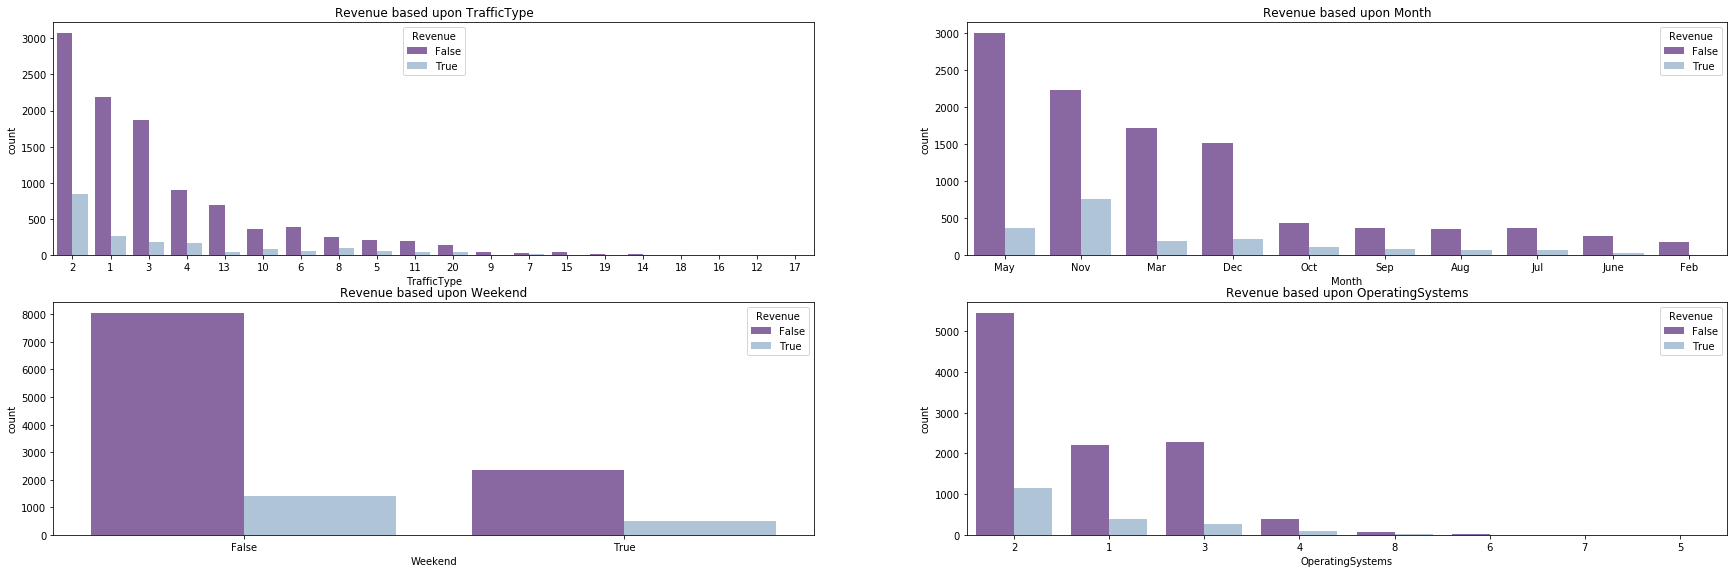

In [14]:
features =['TrafficType','Month','Weekend','OperatingSystems']    
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(6, 2, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "BuPu_r")
    ax.set_title('Revenue based upon'+ " " + feature)

*Ovservations*:
- A lot of sessions from OS and traffic type of category 2 generate revenue and November, seems to generate plenty of revenue something that could be explained by the black Friday deals

In [15]:
#feature engineering 3
#Again a potential key driver for revenue could be the timing, specicifcally  weekends or month November(Balck Friday)
def create3(row):
    if row['Month'] == 'Nov' or row['Weekend'] == 'True':
        value = 1
    else:
        value = 0
    return value

X_train['timing_rev_indicator'] = X_train.apply(create3, axis=1)
X_test['timing_rev_indicator'] = X_test.apply(create3, axis=1)

        
#feature engineering 4
def create4(row):
    if row['OperatingSystems'] == 2  and row['TrafficType'] == 2:
        value = 1
    else:
        value = 0
    
    return value
X_train['systemuser_rev_indicator'] = X_train.apply(create4, axis=1)
X_test['systemuser_rev_indicator'] = X_test.apply(create4, axis=1)

In [16]:
#functions that create a new df with either only the numerical columns or the categorical one
def find_numeric(dataframe):
    for i in dataframe.columns:
        numerical_feat = dataframe.select_dtypes(include = np.number)                                           
        return numerical_feat                             
def find_categoric(dataframe):
    for i in dataframe.columns:
        categorical_feat = dataframe.select_dtypes(exclude = np.number)
        return categorical_feat
#xtrain
X_train_numeric = find_numeric(X_train)
#drop columns that are encoded us numerical but are of categorical nature from our numeric features
X_train_numeric.drop(['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType',],axis=1, inplace=True)

# incorporate the above fearures into the categorical df
X_train_categoric = find_categoric(X_train)
Xtrain_other_categs = X_train[['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType']]
#create a new df with all the categorical features
X_train_categoric = pd.concat([X_train_categoric,Xtrain_other_categs] ,axis=1)

# perform the same steps for xtest
X_test_numeric = find_numeric(X_test)
X_test_numeric.drop(['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType'],axis=1, inplace=True)
X_test_categoric = find_categoric(X_test)
X_test_other_categs = X_test[['systemuser_rev_indicator','SpecialDay','webdur_rev_indicator','Pageval_rev_indicator','timing_rev_indicator','OperatingSystems','Browser','Region','TrafficType']]
#create a new df with all the categorical features
X_test_categoric = pd.concat([X_test_categoric,X_test_other_categs] ,axis=1)


### Numerical Columns Preprocessing:

*Multicollinearity and Variable inflation Factor(VIF)*:
As seen in exploratoty analysis some features correlate very highly with another(>80), something that could indicate overlap of their effects and potential loss of information for our model. To investigate this, we will use Variable Inflation Factor(VIF) with scores over 5 indicating high mutlicolinearity.

In [17]:
def calc_vif(x):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)#calc_vif(X_train_numeric)
calc_vif(X_train_numeric)

,variables,VIF
0,Administrative,2.631333
1,Administrative_Duration,2.041222
2,Informational,2.099741
3,Informational_Duration,1.762355
4,ProductRelated,6.291761
5,ProductRelated_Duration,5.982427
6,BounceRates,5.502834
7,ExitRates,5.738199
8,PageValues,1.080895



- The ProductRelated_Duration and ProductRelated are collinear and thus we will drop one of the two. For not loosing information, we will first engineer a new column (Duration_per_ProductRelatedPage) which derives from dividing ProductRelated_Duration by ProductRelated_page. The same will applied for bounce_rates and exit_rates(VIF>5). Drop of one of the columns will be followed by a creation of a new one to compensate for potential loss of information. The ne column will be the average between exit and bounce_rates.

In [18]:
# drop a feature with multicollinearity
X_train_numeric = X_train_numeric.drop('ProductRelated_Duration',1)

# engineer a new column for not loosing information
X_train_numeric['Duration_per_ProductRelatedPage'] = X_train.ProductRelated_Duration / X_train.ProductRelated
X_train_numeric.Duration_per_ProductRelatedPage.fillna(0,inplace=True)

# apply the same steps for  bouncee and exit rates which were foind collinear too
X_train_numeric['bounce_exit_average'] = (X_train.BounceRates + X_train.ExitRates)/2
X_train_numeric = X_train_numeric.drop('ExitRates',1)
X_train_numeric = X_train_numeric.drop('BounceRates',1)

#check for multicoliearity again

calc_vif(X_train_numeric)

,variables,VIF
0,Administrative,2.548761
1,Administrative_Duration,1.925708
2,Informational,2.099833
3,Informational_Duration,1.714272
4,ProductRelated,1.835146
5,PageValues,1.097315
6,Duration_per_ProductRelatedPage,1.300024
7,bounce_exit_average,1.076503


As seen in the df above, there is no multicolinearity between any of the columns anymore. Now the same remedies will be applied for our test set as well.

In [19]:
X_test_numeric = X_test_numeric.drop('ProductRelated_Duration',1)
X_test_numeric['ProductRelated_Duration_page'] = X_test.ProductRelated_Duration / X_test.ProductRelated
X_test_numeric.ProductRelated_Duration_page.fillna(0,inplace=True)

#calc_vif(X_test_numeric)
X_test_numeric['bounce_exit_average'] = (X_test.BounceRates + X_test.ExitRates)/2

X_test_numeric = X_test_numeric.drop('ExitRates',1)
X_test_numeric = X_test_numeric.drop('BounceRates',1)

calc_vif(X_test_numeric)


,variables,VIF
0,Administrative,2.755539
1,Administrative_Duration,1.972699
2,Informational,2.235172
3,Informational_Duration,1.905844
4,ProductRelated,1.827250
5,PageValues,1.086550
6,ProductRelated_Duration_page,1.319016
7,bounce_exit_average,1.069756


### Outliers and Distributions:
Checking the outliers of the numerical columns based on the boxplots.

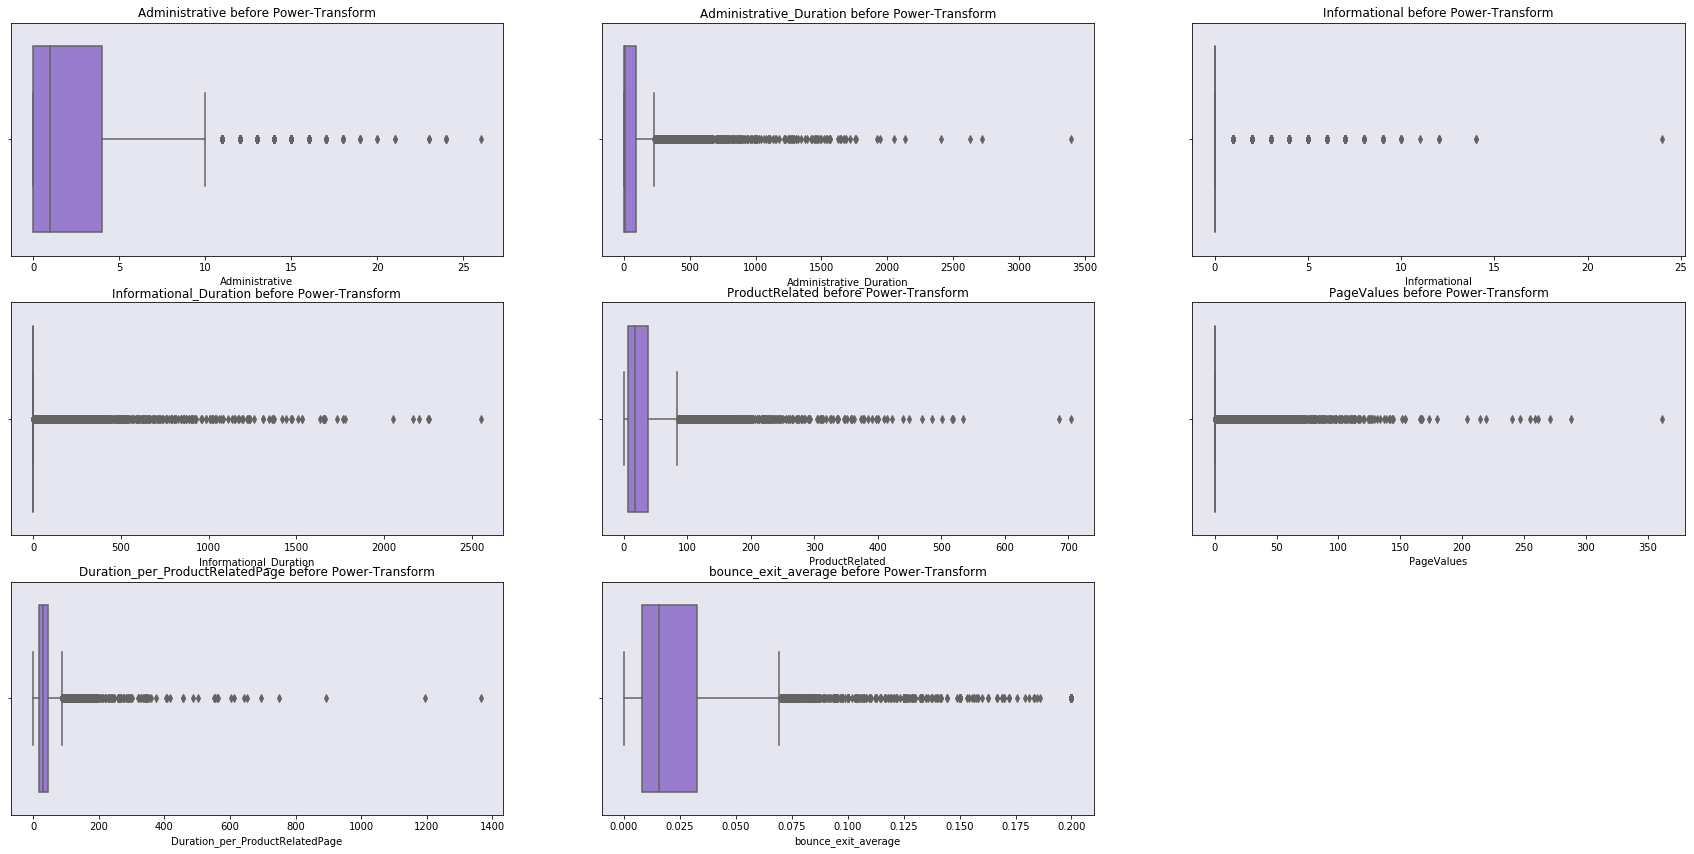

In [20]:
features = X_train_numeric.columns
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.boxplot(X_train_numeric[feature], color='mediumpurple')
    ax.set_facecolor((0.90, 0.90, 0.94))
    ax.set_title(feature + ' ' + 'before Power-Transform')

Now let's visualize the distribution of our numerical data, which will give us an insight on the type of
scaling we should proceed with.

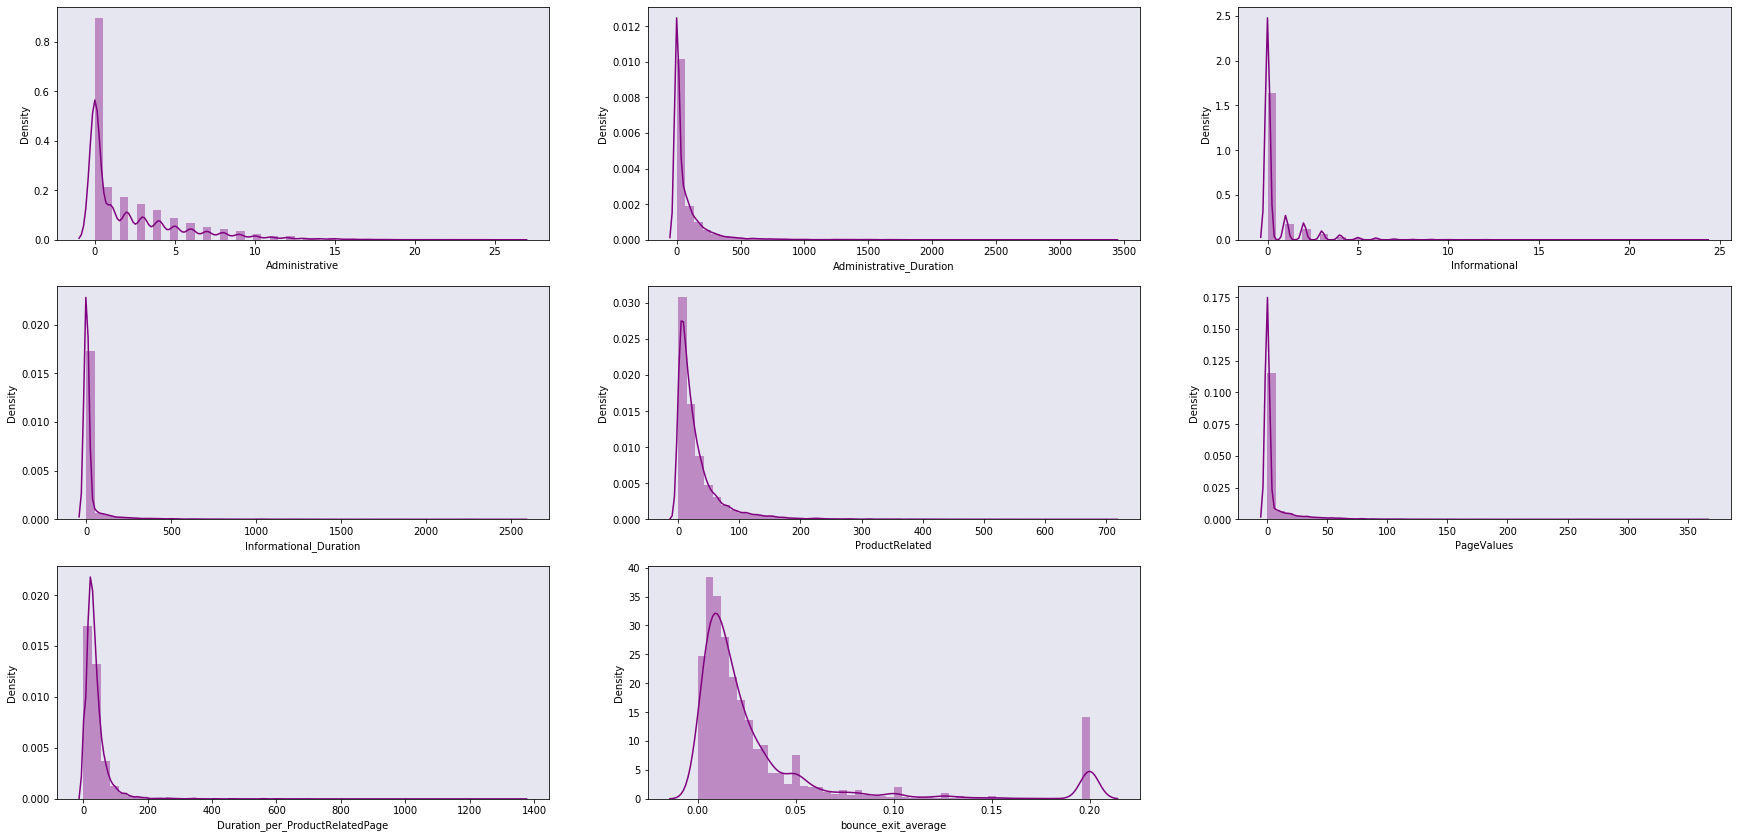

In [21]:
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.distplot(X_train_numeric[feature],  kde_kws={'bw':0.1}, color='purple')
    ax.set_facecolor((0.90, 0.90, 0.94))

*Observation*:
- Most of the numeric fetaures suffer from right skewness. 
One way to corect it is apply a type of transformation that scales the data to a Gaussian manner which is power transformation,speciffically 'Yeo-Johnson' transformation. Furthermore, instead of removing the outliers, the prower tranformation will just decrease their impact in a way that they are not considered outliers anymore. We consider this preferable to removing them as they could represent valuable information for our models.

## Power-Transformation('Yeo-Johnson'):

In [22]:
# call power transformer
power=PowerTransformer(standardize=True)

# Power transformation for both our samples
X_train_numeric = pd.DataFrame(power.fit_transform(X_train_numeric),columns=X_train_numeric.columns)
X_test_numeric = pd.DataFrame(power.transform(X_test_numeric),columns=X_test_numeric.columns)

Now let's visualize the change in the numerical features disribution and what impact the power transformation had on
the multiple outliers

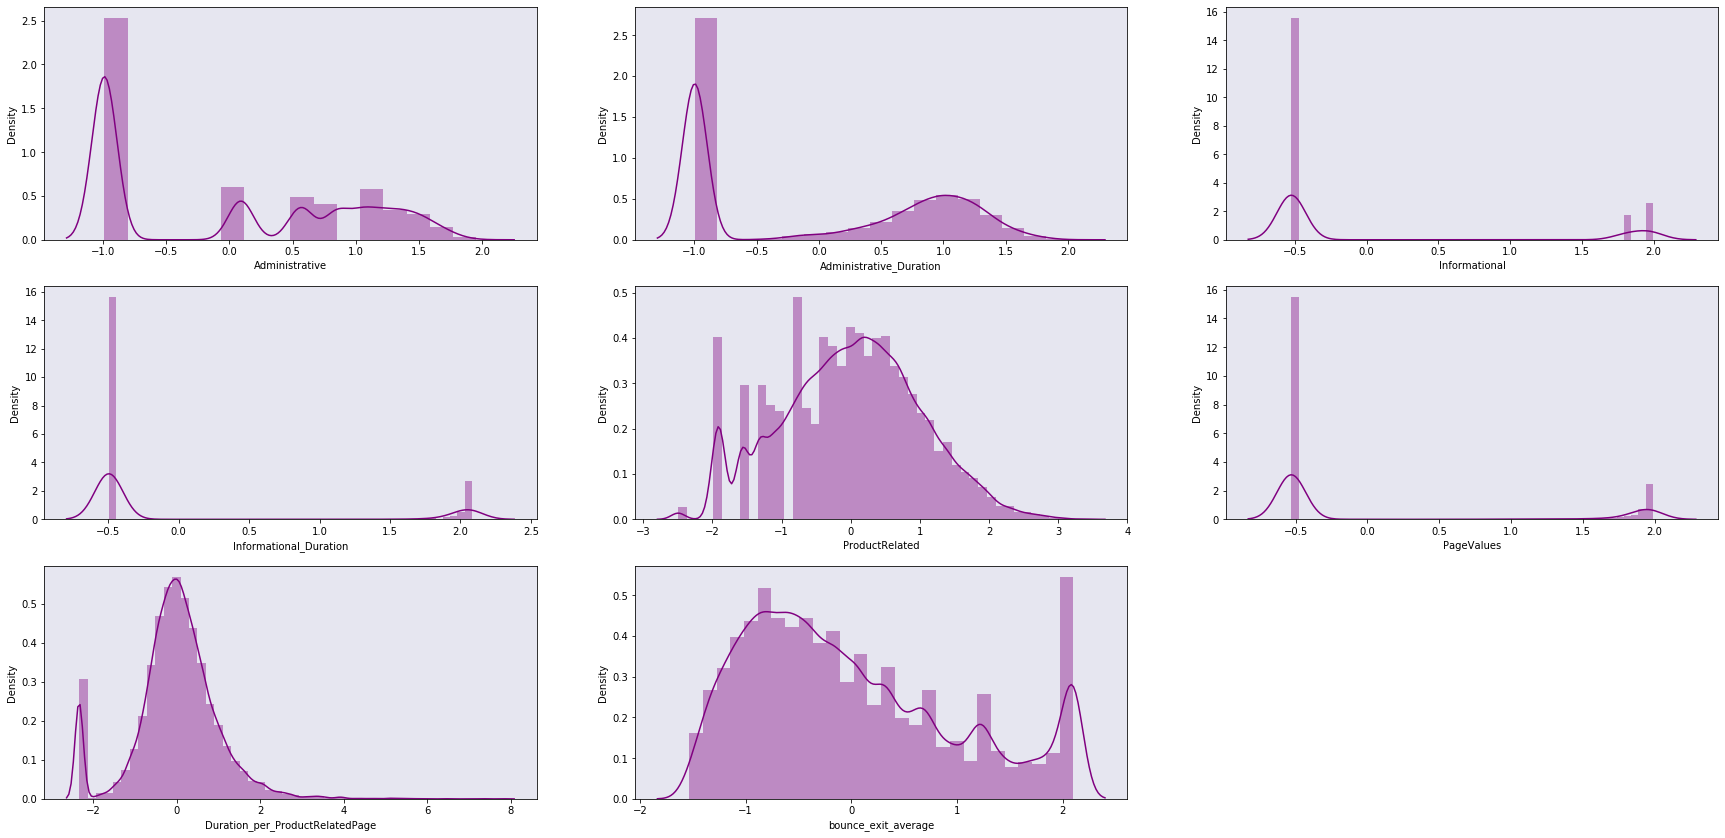

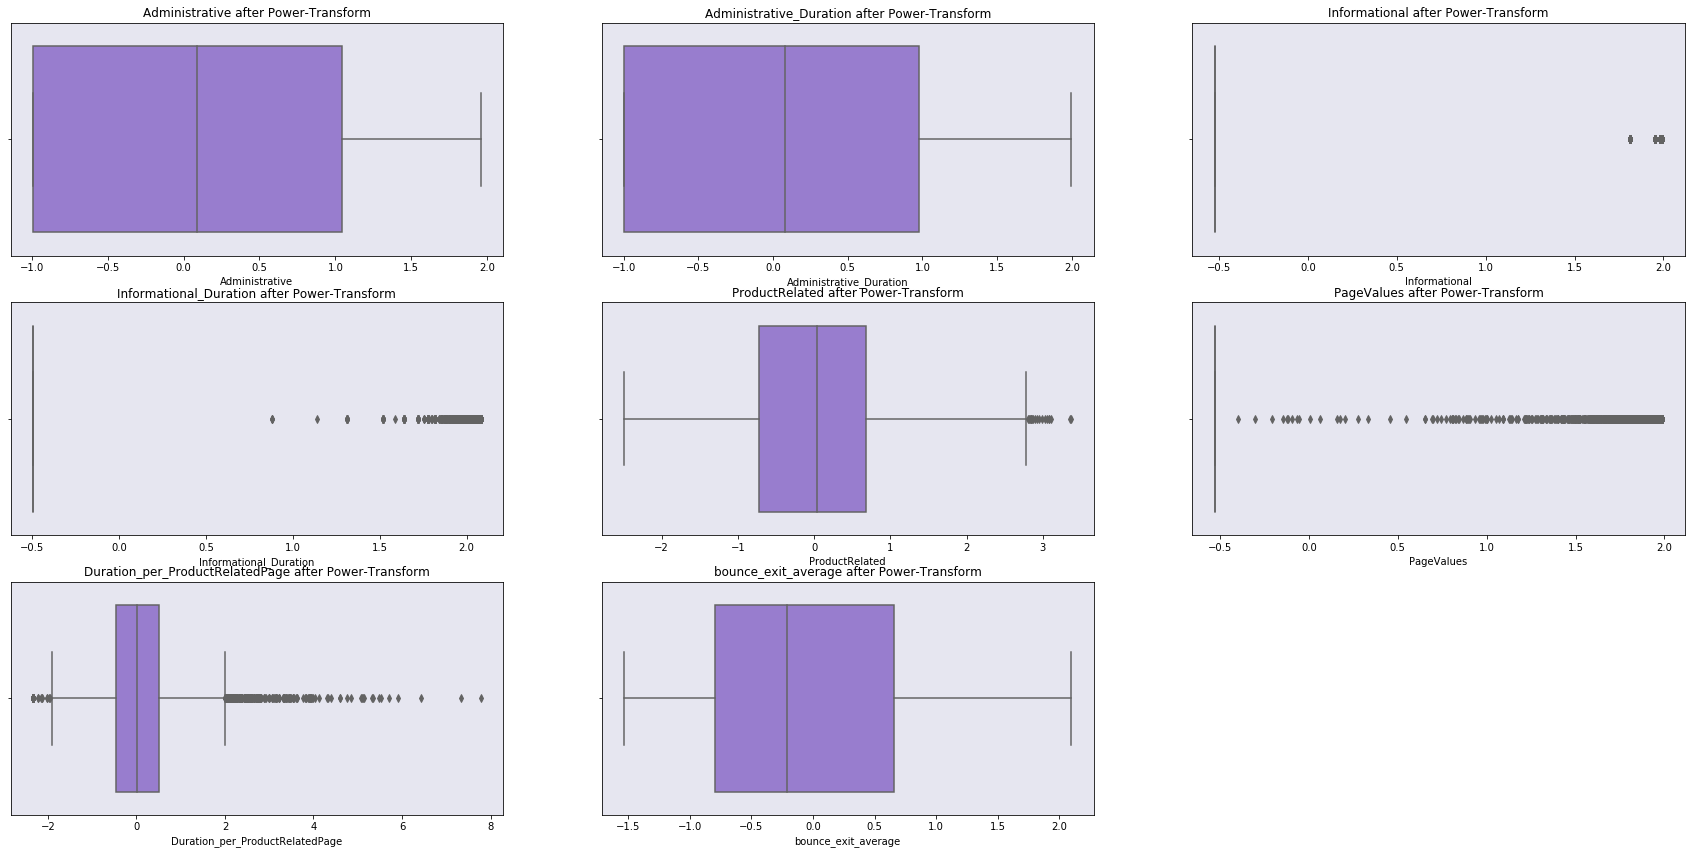

In [23]:
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.distplot(X_train_numeric[feature],  kde_kws={'bw':0.1}, color='purple')
    ax.set_facecolor((0.90, 0.90, 0.94))
    
features = X_train_numeric.columns
plt.figure(figsize=(30,30))
number = 0
for feature in features:
    number = number + 1 
    ax = plt.subplot(6, 3, number,adjustable='datalim')
    ax = sns.boxplot(X_train_numeric[feature], color='mediumpurple')
    ax.set_facecolor((0.90, 0.90, 0.94))
    ax.set_title(feature + ' ' + 'after Power-Transform')


*Observation*:
- Most of the columns were scaled to a Gaussian-like shape and the impact of multiple outliers
was decreased to the point that they do no exceed the above quantiles anymore.


## Categorical Encoding:
one hot encoding is applied and dropped the first column for each categorical feature to avoid multicolinearity.

In [24]:
#store all categorical column names
categoricals=['Pageval_rev_indicator','systemuser_rev_indicator','webdur_rev_indicator','timing_rev_indicator','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend', 'SpecialDay']

X_train =  pd.concat([X_train_categoric.reset_index(drop=True),X_train_numeric.reset_index(drop=True)], axis=1)
X_test =  pd.concat([X_test_categoric.reset_index(drop=True),X_test_numeric.reset_index(drop=True)], axis=1)

X_test=pd.get_dummies(data=X_test,columns=categoricals,drop_first=True)
X_train=pd.get_dummies(data=X_train,columns=categoricals,drop_first=True)

X_train,X_test  = X_train.align(X_test, join='left', axis=1, fill_value=0)


## Dimensionality Reduction with PCA:

Our feature engineering resulted to a high dimensional space of 74 features. Often, in high dimensional spaces, we run the risk of introducing noisy features that not only carry non-usefull information , but could potentially impact the predictions  negatively. To reduce the dimensionality, we will perform PCA.

In [25]:
from sklearn.decomposition import PCA
#iterate over diffent component numbers
for n in [2,5,8,10,15,20,25,30,40]:
    number_features = PCA(n_components=n)
    pca_data = number_features.fit_transform(X_train)
    exp_variance = round(np.sum(number_features.explained_variance_ratio_)*100,2)
    print(n, 'Predictors explain',exp_variance,' % oftotal Variabillity')

2 Predictors explain 43.15  % oftotal Variabillity
5 Predictors explain 65.31  % oftotal Variabillity
8 Predictors explain 76.27  % oftotal Variabillity
10 Predictors explain 80.71  % oftotal Variabillity
15 Predictors explain 87.68  % oftotal Variabillity
20 Predictors explain 91.28  % oftotal Variabillity
25 Predictors explain 93.83  % oftotal Variabillity
30 Predictors explain 95.65  % oftotal Variabillity
40 Predictors explain 98.14  % oftotal Variabillity


The PCA shows us that a number between 10 and 40 components could be the optimal in terms of simplicity and this will be the range which we'll use in our model building phase to optimize their performance. 40 out of 74 features explain more than 98% of the total variance, meaning that we have many noisy,non-contributing dimensions.

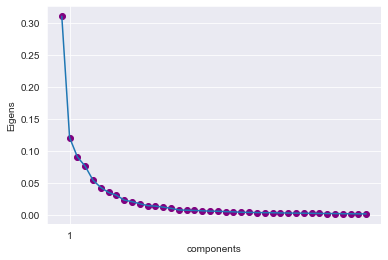

In [26]:
# scree plot for showing eigenvalues for differnet component numbers
sns.set_style(style='darkgrid')
plt.plot(number_features.explained_variance_ratio_,'o', color = 'purple')
plt.plot(number_features.explained_variance_ratio_)
plt.xticks(range(1,35,40))
plt.xlabel('components')
plt.ylabel('Eigens')
plt.show()

# Model Building:

### Classification Algorithms: 
Three classification methods applied: SVM,XGBoost and Logistic Regresion


In [27]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors()



# store the algorithms
# for the weighted SVM we mannualy tuned the class wights through trial and error 
# to optimize the  fbeta score
Support_Vector_Machine = SVC(random_state = 123, class_weight = {0: 0.41, 1: 0.59})#overweighing the positive minority class
XGboost = XGBClassifier(random_state = 123)
Logistic_Regression= LogisticRegression(solver = 'liblinear', random_state = 123)


# train and get results for the base models
for alg in [Support_Vector_Machine,XGboost,Logistic_Regression]:
    alg.fit(X_train,y_train.values.ravel())
    ypred_train =alg.predict(X_train)
    ypred_test = alg.predict(X_test)
    print('Weighted Support Vector Machine Base Model:')
    print()

    # get precision,recall, fbeta score, and pr auc score from predictions
    if alg == Support_Vector_Machine:
        base_svm_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
        print('Base Support Vector Machine Test Precision:', base_svm_prec)
        base_svm_recall = '%.3f'%recall_score(y_test,ypred_test).round(2)
        print('Base Support Vector Machine Test Recall:', base_svm_recall)
        base_svm_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
        print('Base Support Vector Machine Test fbeta score:', base_svm_Fbeta)
        precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
        base_svm_auc_pr = '%.3f'%auc(recall, precision).round(2)
        print('Base Support_Vector_Machine Test Precision Recall auc:', base_svm_auc_pr)
        print()
        print('XGboost Base Model:')
        print()

    elif alg == XGboost:
        base_xgb_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
        print('Base XGboost Test Precision:', base_xgb_prec)
        base_xgb_recall = '%.3f'%recall_score(y_test,ypred_test).round(2)
        print('Base XGboost Test Recall:', base_xgb_recall)
        base_xgb_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
        print('Base XGboost Test fbeta score:', base_xgb_Fbeta)
        precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
        base_xgb_auc_pr =  '%.3f'%auc(recall, precision).round(2)
        print('Base XGboost Test Precision Recall auc:', base_xgb_auc_pr)
        print()
        print('Logistic Regression Base Model:')
        print()

    elif alg == Logistic_Regression:
        base_lr_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
        print('Base Logistic Regression Test Precision:', base_lr_prec)
        base_lr_recall = '%.3f'%recall_score(y_test,ypred_test).round(2)
        print('Base Logistic Regression  Test Recall:', base_lr_recall)
        base_lr_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
        print('Base Logistic Regression  Test fbeta score:', base_lr_Fbeta)
        precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
        base_lr_auc_pr = '%.3f' %auc(recall, precision).round(2)
        print('Base Logistic Regression  Test Precision Recall auc:', base_lr_auc_pr)

Weighted Support Vector Machine Base Model:

Base Support Vector Machine Test Precision: 0.700
Base Support Vector Machine Test Recall: 0.770
Base Support Vector Machine Test fbeta score: 0.740
Base Support_Vector_Machine Test Precision Recall auc: 0.750

XGboost Base Model:

[15:41:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Weighted Support Vector Machine Base Model:

Base XGboost Test Precision: 0.730
Base XGboost Test Recall: 0.550
Base XGboost Test fbeta score: 0.610
Base XGboost Test Precision Recall auc: 0.680

Logistic Regression Base Model:

Weighted Support Vector Machine Base Model:

Base Logistic Regression Test Precision: 0.740
Base Logistic Regression  Test Recall: 0.640
Base Logistic Regression  Test fbeta score: 0.670
Base Logistic Regression 

Shown above,the weighted SVM resulted to the best classifcation performance amongst our baseline models with higher 
Fscore and PR curves than XGboost and Logistic Regression

Now we will try to visualize the decision boundary change between a plain support vector machine algorithm and the class weighted one(overweighing the revenue class).

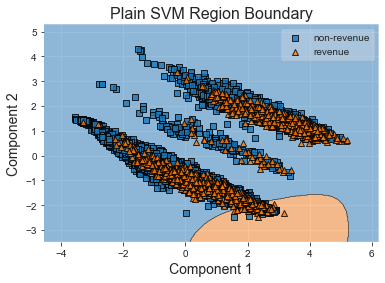

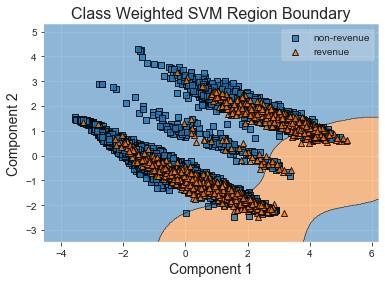

In [28]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# first we will reduce the dimensions to two with PCA as high dimensional spaces cannot be visualized.
pca_features = PCA(n_components=2, random_state = 6)
pca_svm_plain_train = pca_features.fit_transform(X_train)


SVM_Plain = SVC(kernel = 'rbf', random_state = 123)
Class_Weighted_SVM= SVC(random_state = 123, class_weight = {0: 0.41, 1: 0.59})#overweighing the positive minority class

#fit the algorithms
SVM_Plain.fit(pca_svm_plain_train,y_train.values.ravel())
Class_Weighted_SVM.fit(pca_svm_plain_train,y_train.values.ravel())


# Plot Decision Region for plain svm
plot = plot_decision_regions(X=pd.DataFrame(pca_svm_plain_train).values, 
                      y=y_train.values.ravel(),
                      clf=SVM_Plain, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(pd.DataFrame(pca_svm_plain_train).columns[0], size=14)
plt.xlabel('Component 1')
plt.ylabel(pd.DataFrame(pca_svm_plain_train).columns[1], size=14)
plt.ylabel('Component 2')


handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, 
          ['non-revenue', 'revenue'], 
           framealpha=0.3, scatterpoints=1)
plt.title('Plain SVM Region Boundary', size=16)
plt.show()


# Plot Decision Region for plain svm
plot2 = plot_decision_regions(X=pd.DataFrame(pca_svm_plain_train).values, 
                      y=y_train.values.ravel(),
                      clf=Class_Weighted_SVM, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(pd.DataFrame(pca_svm_plain_train).columns[0], size=14)
plt.xlabel('Component 1')
plt.ylabel(pd.DataFrame(pca_svm_plain_train).columns[1], size=14)
plt.ylabel('Component 2')

handles, labels = plot2.get_legend_handles_labels()
plot2.legend(handles, 
          ['non-revenue', 'revenue'], 
           framealpha=0.3, scatterpoints=1)
plt.title('Class Weighted SVM Region Boundary', size=16)
plt.show()


The  second plot clearly shows us that increase of the weight of positive class caused the explansion of the yellow region in which a point can be classified as revenue, meaning that a cost-sensitive SVM deals with the bias towards the majority class in an imbalanced dataset.

# Classification Threshold tuning:
First step to build upon our baseline models is the to optimize the classification threshold in terms of Fscore and perform PCA to reduce the dimensionality'
# XGboost

In [29]:
from numpy import arange
from numpy import argmax
import lightgbm as lab
from sklearn.metrics import average_precision_score, precision_recall_curve#
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors()#function to map certain probabilities to classes. Probabilities over a threshold map to 1 and below map to 0

def turn_classes(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

xgb= XGBClassifier(random_state = 1)
components = [10,11,12,13,14, 15,17,20,25,30,35,40] #store different number of components in a list
# Iterate over all possible number of components,check which one maximizes fbeta, store it in a variable
#and use the optimal PCA later.
dic_xgb = {}
for number in components:
    pca_features = PCA(n_components=number, random_state = 6)
    xgb_train = pca_features.fit_transform(X_train)
    xgb_test = pca_features.transform(X_test)
    xgb.fit(xgb_train,y_train.values.ravel())
    ypred_train =xgb.predict(xgb_train)
    ypred_test = xgb.predict(xgb_test)
    dic_xgb.update({number : fbeta_score(y_test,ypred_test, beta= 1.2)})
print(dic_xgb)
optimal_xgb_comp = max(dic_xgb, key=dic_xgb.get)  
print('Number of Components that maximize fbeta:' , optimal_xgb_comp)
print()

#implement xgboost algorithm with optimal number of components 
pca_features = PCA(n_components = optimal_xgb_comp, random_state = 123)
xgb_train = pca_features.fit_transform(X_train)
xgb_test = pca_features.transform(X_test)
xgb.fit(xgb_train,y_train.values.ravel())
# start the proccess of probability theshold tuning by predicting the probabilities
prob = xgb.predict_proba(xgb_test)

# keep probabilities for the positive class
probs_test = prob[:,1]

# create all possible thresholds
thresholds = arange(0, 1, 0.001)
# check each threshold in respect to fbeta score
scores_f1 = [fbeta_score(y_test, turn_classes(probs_test, val), beta= 1.3) for val in thresholds]
# extract optimal thresh
opt = argmax(scores_f1)
#y_pred = turn_classes(probs_test,thresholds[opt])

#make predictions  based on actual values and predicted probabilities which are turnt into classes with turn_classes function
print('Fbeta score = %.3f'% fbeta_score(y_test, turn_classes(probs_test,thresholds[opt]),beta= 1.3))
print('recall = %.3f'% recall_score(y_test, turn_classes(probs_test,thresholds[opt])))
print('precision = %.3f'% precision_score(y_test, turn_classes(probs_test,thresholds[opt])))
#print('roc = %.4f'%  roc_auc_score(y_test, turn_classes(probs_test,thresholds[opt])))
xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(y_test, turn_classes(probs_test,thresholds[opt]))
xgb_auc_precision_recall = auc(xgb_recall, xgb_precision)
print('precision-recall auc = %.3f'% xgb_auc_precision_recall)



[15:42:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

Perform Randomized search for hyperparameters optimization on the XGboost algorithm. Ensemble methods such as XGboost are computationally expensive and Gridsearch would be very time consuming. The initialized parameters in param grid are values that were found above as possible high performance values though manual tunning/trial and error above.

In [30]:
from scipy.stats import randint as randint
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

xgb = XGBClassifier()
fbeta = make_scorer(fbeta_score, beta=1.3)
#Creating a dictionary grid for grid search
param_grid = {'scale_pos_weight': [1.7,1.8, 1.9],
             'min_child_weight': [ 1.06, 1.46],
             'n_estimators': [106,116, 126,136],}

cv = StratifiedKFold(n_splits=5)
rsearch = RandomizedSearchCV(estimator= xgb, 
                          param_distributions= param_grid,#
                          cv=cv, 
                             
                          n_jobs=-1,n_iter=10, 
                          scoring=fbeta, 
                          verbose=2).fit(xgb_train, y_train.values.ravel())
print(rsearch.best_params_)
#store the optimized parameters in the XGboost classifier


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[15:43:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'scale_pos_weight': 1.8, 'n_estimators': 106, 'min_child_weight': 1.46}


###  Fit of the tuned XGboost to the train model and generation of predictions

In [31]:
###### fit the optimized classifier to the releveant training set
#'scale_pos_weight': 2.25, 'n_estimators': 115, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1}
#xgb = XGBClassifier( n_estimators=136,scale_pos_weight = 1.9,min_child_weight = 1.46, random_state=1)
xgb=XGBClassifier(**rsearch.best_params_,random_state=1)
xgb.fit(xgb_train,y_train.values.ravel())
prob = xgb.predict_proba(xgb_test)
# keep probabilities for the positive outcome only
probs_xgb = prob[:,1]
# create possible thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores_f1 = [fbeta_score(y_test, turn_classes(probs_xgb, val), beta= 1.3) for val in thresholds]
# extract optimal thresh
opt_xgb = argmax(scores_f1)
#y_pred = turn_classes(probs_test,thresholds[opt])

print('Results for threshold tuned XGboost:')
print()
thres_tuned_xgb_fb =  '%.3f'%fbeta_score(y_test, turn_classes(probs_xgb,thresholds[opt_xgb]),beta= 1.3)
print('fbeta:' , thres_tuned_xgb_fb)
thres_tuned_xgb_rec =  '%.3f'%recall_score(y_test, turn_classes(probs_xgb,thresholds[opt_xgb])).round(2)
print('recall :', thres_tuned_xgb_rec)
thres_tuned_xgb_prec =  '%.3f'% precision_score(y_test, turn_classes(probs_xgb,thresholds[opt_xgb])).round(2)
print('precision :', thres_tuned_xgb_prec)
xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(y_test, turn_classes(probs_xgb,thresholds[opt_xgb]))
tuned_xgb_pr_auc = '%.3f'%auc(xgb_recall, xgb_precision).round(2)
print('precision-recall auc :' ,tuned_xgb_pr_auc)

[15:43:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for threshold tuned XGboost:

fbeta: 0.708
recall : 0.810
precision : 0.580
precision-recall auc : 0.710


The hyperparameters optimization and mainly the classification threshold tuning resulted to a significant performance increase of XGboost classifier. The above remedies improved recall from 0.63 to 0.79(fbeta increased by .08) and enhanced our classfier's ability to identify true positives, which is very crucial for a company that wants to identify potential buyers.

# Logistic Regression

In [32]:
lr = LogisticRegression(random_state = 123)

#Determine the optiimal number of compnenets that maximizes fbeta
components =[10,11,12,13,14,15,20,25,30,35,40]
dic_lr = {}
for number in components:
    pca_features = PCA(n_components=number)
    lr_train = pca_features.fit_transform(X_train)
    lr_test = pca_features.transform(X_test)
    lr.fit(lr_train,y_train.values.ravel())
    ypred_train =lr.predict(lr_train)
    ypred_test = lr.predict(lr_test)
    dic_lr.update({number : '%.4f' % fbeta_score(y_test,ypred_test, beta=1.3)})
print(dic_lr)
optimal_lr_comp = max(dic_lr, key=dic_lr.get)  
print('The number of components that optimizes Fbeta is:', optimal_lr_comp)
lr = LogisticRegression(random_state = 123)
print()
#implement svm algorithm with optimalnumber of components #
pca_features = PCA(n_components=optimal_lr_comp, random_state = 123)
lr_train = pca_features.fit_transform(X_train)
lr_test = pca_features.transform(X_test)
lr.fit(lr_train,y_train.values.ravel())

# predict probabilities
prob = lr.predict_proba(lr_test)
# keep probabilities for the positive outcome only
probs_test = prob[:,1]
# create possible thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores_f1 = [fbeta_score(y_test, turn_classes(probs_test, val), beta=1.3) for val in thresholds]
# extract optimal thresh
opt = argmax(scores_f1)
print('Logistic Regression results:')
print()
print('F1 score = %.4f'% fbeta_score(y_test, turn_classes(probs_test,thresholds[opt]),beta= 1.3))
print('recall = %.4f'% recall_score(y_test, turn_classes(probs_test,thresholds[opt])))
print('precision = %.4f'% precision_score(y_test, turn_classes(probs_test,thresholds[opt])))
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, turn_classes(probs_test,thresholds[opt]))
lr_auc_precision_recall = auc(lr_recall, lr_precision)
print('precision-recall auc = %.4f'% lr_auc_precision_recall)


{10: '0.7121', 11: '0.7098', 12: '0.7121', 13: '0.7083', 14: '0.6952', 15: '0.6975', 20: '0.6923', 25: '0.6747', 30: '0.6803', 35: '0.6771', 40: '0.6714'}
The number of components that optimizes Fbeta is: 10

Logistic Regression results:

F1 score = 0.7406
recall = 0.7683
precision = 0.6981
precision-recall auc = 0.7511


## Optimize hyperparameters of Logistic regression and fit the optimized algorithm


In [33]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=123)
params = {'solver': ['liblinear'],
        'penalty' : [ 'l2', 'l1'],
          'C':[0.1,0.3,0.5,0.8,1,1.5,2,2.5,3,4,5]}
rand = RandomizedSearchCV(lr, param_distributions = params,cv=10,scoring = fbeta).fit(lr_train, y_train.values.ravel())
print('Optimal parameters:', rand.best_params_)

#store the optimized parameters in the Logisti Rgression classifier
lr=LogisticRegression(**rand.best_params_)

#lr=LogisticRegression(C = 2,random_state=123)
#Fit the optimized claasifier to the relevant training set
lr.fit(lr_train,y_train.values.ravel())

# predict probabilities
prob = lr.predict_proba(lr_test)
# keep probabilities for the positive outcome only
probs_lr = prob[:,1]
# create possible thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores_f1 = [fbeta_score(y_test, turn_classes(probs_lr, val), beta=1.3) for val in thresholds]
# extract optimal thresh
opt_lr = argmax(scores_f1)
print('Results for threshold tuned Logistic Regression:')
print()
thres_tuned_lr_fb =  '%.3f'%fbeta_score(y_test, turn_classes(probs_lr,thresholds[opt_lr]),beta= 1.3).round(2)
print('fbeta:' , thres_tuned_lr_fb)
thres_tuned_lr_rec =  '%.3f'%recall_score(y_test, turn_classes(probs_lr,thresholds[opt_lr])).round(2)
print('recall :', thres_tuned_lr_rec)
thres_tuned_lr_prec =  '%.3f'% precision_score(y_test, turn_classes(probs_lr,thresholds[opt_lr])).round(2)
print('precision :', thres_tuned_lr_prec)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, turn_classes(probs_lr,thresholds[opt_lr]))
tuned_lr_pr_auc = '%.3f'%auc(lr_recall, lr_precision).round(2)
print('precision-recall auc :' ,tuned_lr_pr_auc)

Optimal parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 2}
Results for threshold tuned Logistic Regression:

fbeta: 0.740
recall : 0.770
precision : 0.700
precision-recall auc : 0.750


In [34]:
from sklearn.metrics import accuracy_score

#Determine the optiimal number of compnenets that maximizes fbeta
#Store component numbers in a list and iterate through them to check which number
#yields the best Fbeta
components = [10,11,12,13,15,20,25,30,35]
svc = SVC(random_state = 123, probability=True)
dic_svm = {}
for number in components:
    pca_features = PCA(n_components=number, random_state = 123)
    svm_train = pca_features.fit_transform(X_train)
    svm_test = pca_features.transform(X_test)
    svc.fit(svm_train,y_train.values.ravel())
    ypred_train =svc.predict(svm_train)
    ypred_test = svc.predict(svm_test)
    dic_svm.update({number : fbeta_score(y_test,ypred_test, beta= 1.3)})
print(dic_svm)
#extract the number off compnents that yields the best performance
optimal_svm_comp = max(dic_svm, key=dic_svm.get)  
print('Optimal components for SVM:', optimal_svm_comp)

#implement svm algorithm with optimal number of components 

svc = SVC(random_state = 123, probability=True, class_weight = {0: 0.41, 1: 0.59})
pca_features = PCA(n_components=optimal_svm_comp)
#Method 1, train classifier within CCCV
pca_features = PCA(n_components=optimal_svm_comp)
svm_train = pca_features.fit_transform(X_train)
svm_test = pca_features.transform(X_test)
svc.fit(svm_train,y_train.values.ravel())

# predict probabilities
yhat = svc.predict_proba(svm_test)
# keep probabilities for the positive outcome only
probs_test = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [fbeta_score(y_test, turn_classes(probs_test, t), beta= 1.3) for t in thresholds]
# get best threshold
ix = argmax(scores)
print()
print('Class-Weighted SVM results:')
print()
print('Accuracy score = %.4f'% accuracy_score(y_test, turn_classes(probs_test,thresholds[ix])))
print('Fbeta score = %.4f'% fbeta_score(y_test, turn_classes(probs_test,thresholds[ix]),beta= 1.3))
print('recall = %.4f'% recall_score(y_test, turn_classes(probs_test,thresholds[ix])))
print('precision = %.4f'% precision_score(y_test, turn_classes(probs_test,thresholds[ix])))
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, turn_classes(probs_test,thresholds[ix]))
lr_auc_precision_recall = auc(lr_recall, lr_precision)
print('precision-recall auc = %.4f'% lr_auc_precision_recall)

{10: 0.7094616869966561, 11: 0.7024411570091693, 12: 0.7024411570091693, 13: 0.6970237246232112, 15: 0.6985604515486411, 20: 0.6963092852371411, 25: 0.6946520373191166, 30: 0.6938263680882423, 35: 0.6954796740218272}
Optimal components for SVM: 10

Class-Weighted SVM results:

Accuracy score = 0.9081
Fbeta score = 0.7404
recall = 0.7866
precision = 0.6736
precision-recall auc = 0.7466


In order to optimize the weighted SVM paramete randomized search was choosen instead of
extensive grid search as it required more computation power.

In [35]:
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform 


svc = SVC(random_state = 123,  class_weight = {0: 0.41, 1: 0.59}, probability = True)
#initialize  C parametetr values for search
params =  {'C': [1,1.2,1.5,2],
           }
          
# perform  search 
rand = RandomizedSearchCV(svc, param_distributions = params,cv=3, n_jobs=2,scoring = fbeta).fit(svm_train, y_train.values.ravel())
print('Optimal parameters:', rand.best_params_)

svc=SVC(**rand.best_params_,random_state=123, class_weight = {0: 0.42, 1: 0.58}, probability = True)

#svc= SVC(C=1,random_state=123,  class_weight = {0: 0.42, 1: 0.58}, probability = True)
svc.fit(svm_train,y_train.values.ravel())
# predict probabilities
yhat = svc.predict_proba(svm_test)
# keep probabilities for the positive outcome only
probs_svm = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [fbeta_score(y_test, turn_classes(probs_svm, t), beta= 1.3) for t in thresholds]
# get best threshold
ix_svm = argmax(scores)
print('Results for threshold tuned SVM:')
print()
thres_tuned_svm_fb =  '%.3f'%fbeta_score(y_test, turn_classes(probs_svm,thresholds[ix_svm]),beta= 1.3).round(2)
print('fbeta:' , thres_tuned_svm_fb)
thres_tuned_svm_rec =  '%.3f'%recall_score(y_test, turn_classes(probs_svm,thresholds[ix_svm])).round(2)
print('recall :', thres_tuned_svm_rec)
thres_tuned_svm_prec =  '%.3f'% precision_score(y_test, turn_classes(probs_svm,thresholds[ix_svm])).round(2)
print('precision :', thres_tuned_svm_prec)
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(y_test, turn_classes(probs_svm,thresholds[ix_svm]))
tuned_svm_pr_auc = '%.3f'%auc(svm_recall, svm_precision).round(2)
print('precision-recall auc :' ,tuned_svm_pr_auc)

Optimal parameters: {'C': 1.2}
Results for threshold tuned SVM:

fbeta: 0.740
recall : 0.790
precision : 0.670
precision-recall auc : 0.750


Changing the threshold and performing PCA  resulted to marginal differences for our class weighted suport vector machine compared to our base SVM. Only Precision elavated by .02 icreasing our model's ability to classify correctly the negative class.

  ## Summary of the results so far:

In [36]:
# df with the scores from the base models
df_scores=pd.DataFrame({'Model': ['Base XGboost', 'Base Logistic Regression', 'Base Weighted SVM'], 
                'Recall' : [base_xgb_recall, base_lr_recall ,base_svm_recall],
                'Precision' : [base_xgb_prec,base_lr_prec ,base_svm_prec],
                'Fbeta' : [base_xgb_Fbeta, base_lr_Fbeta ,base_svm_Fbeta],
                'PR AUC score' : [base_xgb_auc_pr, base_lr_auc_pr,base_svm_auc_pr]})
                
# second dg with the scores of the threshold tuned models
df2_scores=pd.DataFrame({'Model': ['Threshold Tuned XGboost/PCA', 'Threshold Tuned Logistic Regression/PCA', 'Threshold Tuned Weighted SVM/PCA'], 
                'Recall' : [thres_tuned_xgb_rec, thres_tuned_lr_rec ,thres_tuned_svm_rec],
                'Precision' : [thres_tuned_xgb_prec,thres_tuned_lr_prec ,thres_tuned_svm_prec],
                'Fbeta' : [thres_tuned_xgb_fb, thres_tuned_lr_fb ,thres_tuned_svm_fb],
                'PR AUC score' : [tuned_xgb_pr_auc, tuned_lr_pr_auc,tuned_svm_pr_auc]})
df_scores = df_scores.append(df2_scores)
df_scores

,Model,Recall,Precision,Fbeta,PR AUC score
0,Base XGboost,0.550,0.730,0.610,0.680
1,Base Logistic Regression,0.640,0.740,0.670,0.720
2,Base Weighted SVM,0.770,0.700,0.740,0.750
0,Threshold Tuned XGboost/PCA,0.810,0.580,0.708,0.710
1,Threshold Tuned Logistic Regression/PCA,0.770,0.700,0.740,0.750
2,Threshold Tuned Weighted SVM/PCA,0.790,0.670,0.740,0.750


### Confusion Matrices for each one of our classifiers after threshold tunning:

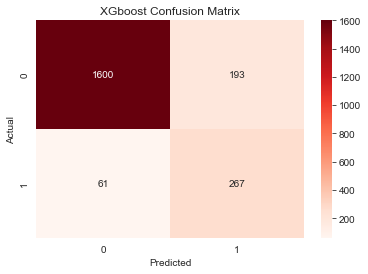

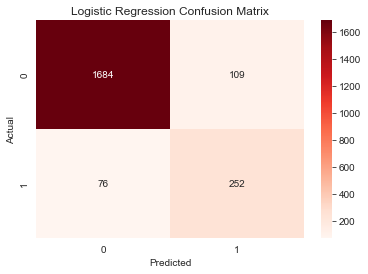

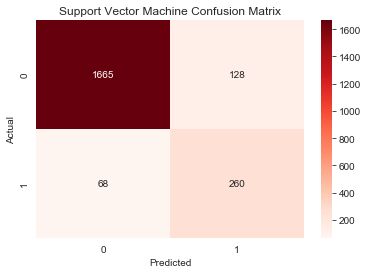

In [37]:

import seaborn as sn
import matplotlib.pyplot as plt

# Visualize the 3 clasisfiers performance with confusion matrices
dic_train = {xgb : xgb_train, lr: lr_train, svc:svm_train}
dic_test = {xgb : xgb_test, lr: lr_test, svc:svm_test}
for model in [xgb, lr, svc]:
        predictions_xgb = pd.DataFrame(turn_classes(probs_xgb,thresholds[opt_xgb]))
        predictions_lr = pd.DataFrame(turn_classes(probs_lr,thresholds[opt_lr]))
        predictions_svm = pd.DataFrame(turn_classes(probs_svm,thresholds[ix_svm]))
        turn_classes(probs_svm,thresholds[ix_svm])
        if model == xgb:
            df =  pd.concat([y_test.reset_index(drop=True),predictions_xgb.reset_index(drop=True)], axis=1, )
            df['Actual'] = df.iloc[:,0] 
            df['Predicted'] = df.iloc[:,1] 
            df =  pd.concat([df['Actual'].reset_index(drop=True),df['Predicted'].reset_index(drop=True)], axis=1, )
            confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
            ax = plt.axes()
            sns.heatmap(confusion_matrix, annot=True,fmt='g', cmap='Reds')
            ax.set_title('XGboost Confusion Matrix')
            plt.show()
        elif model == lr:
            df =  pd.concat([y_test.reset_index(drop=True),predictions_lr.reset_index(drop=True)], axis=1, )
            df['Actual'] = df.iloc[:,0] 
            df['Predicted'] = df.iloc[:,1] 
            df =  pd.concat([df['Actual'].reset_index(drop=True),df['Predicted'].reset_index(drop=True)], axis=1, )
            confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
            ax = plt.axes()
            sns.heatmap(confusion_matrix, annot=True,fmt='g', cmap='Reds')
            ax.set_title('Logistic Regression Confusion Matrix')
            plt.show()
        else:
            df =  pd.concat([y_test.reset_index(drop=True),predictions_svm.reset_index(drop=True)], axis=1, )
            df['Actual'] = df.iloc[:,0] 
            df['Predicted'] = df.iloc[:,1] 
            df =  pd.concat([df['Actual'].reset_index(drop=True),df['Predicted'].reset_index(drop=True)], axis=1, )
            confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
            ax = plt.axes()
            sns.heatmap(confusion_matrix, annot=True,fmt='g', cmap='Reds')
            ax.set_title('Support Vector Machine Confusion Matrix')
            plt.show()
    

        

### Precision-Recall Area under the Curve(PR-AUC) for our algorithms

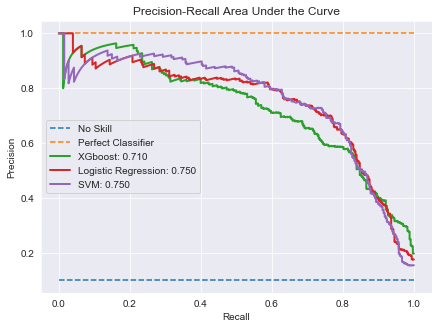

In [38]:
from matplotlib import pyplot
from sklearn.dummy import DummyClassifier


probs_xgb = xgb.predict_proba(xgb_test)
probs_xgb = probs_xgb[:, 1]

probs_lr = lr.predict_proba(lr_test)
probs_lr = probs_lr[:, 1]

probs_svc = svc.predict_proba(svm_test)
probs_svc = probs_svc[:, 1]

xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, probs_xgb)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs_lr)
svc_precision, svc_recall, _ = precision_recall_curve(y_test, probs_svc)

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Precision-Recall Area Under the Curve')

# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [0.1 , 0.1], linestyle='--', label='No Skill')
ax.plot([0, 1], [1 , 1], linestyle='--', label='Perfect Classifier')

pyplot.plot(xgb_recall, xgb_precision, label='XGboost:'+ ' '+ tuned_xgb_pr_auc , linewidth=2)
pyplot.plot(lr_recall, lr_precision, label='Logistic Regression:'+ ' '+ tuned_lr_pr_auc, linewidth=2)
pyplot.plot(svc_recall, svc_precision , label='SVM:' + ' '+ tuned_svm_pr_auc, linewidth=2)


# axis labels
pyplot.xlabel('Recall')
#pyplot.setp(leg_lines, linewidth=4)
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
ax.legend(loc='center left');
# show the plot
pyplot.show()

#         Implementation of resampling Techniques :


First, we will implement a number of oversampling and undersampling techniques and test which one mazimizes 
fbeta score for each one of the algorithms. 

In [39]:
#call the resmpling techniques
undersample = RandomUnderSampler(sampling_strategy='majority')
near_miss= NearMiss()
smote = SMOTE()
oversample = RandomOverSampler()
smto = SMOTETomek()
bsmote = BorderlineSMOTE()
smoteen = SMOTEENN()
gsmote = GeometricSMOTE ()
Tomek = TomekLinks()

#store all the techniques in a list 
balance_techniques = [smote,smto, bsmote, smoteen, gsmote, undersample, oversample, near_miss]

# store the algorithms 
xgb = XGBClassifier(random_state = 123)
lr = LogisticRegression(random_state = 123)
svc = SVC(random_state = 123)

print('SVM with resampling techniques:')
#Iterate through all the resampling fits to our training set and check which one technique optimizes fbeta for SVM
dic = {}
for technique  in balance_techniques:
    xsmote,ysmote=technique.fit_resample(svm_train,y_train)
    svc.fit(xsmote,ysmote.values.ravel()) 
    ypred_train =svc.predict(xsmote)
    ypred_test = svc.predict(svm_test)
    dic.update({technique : '%.4f'% fbeta_score(y_test,ypred_test, beta= 1.3)})
print(dic)
optimal_svm_oversampling = max(dic, key =  dic.get)  

print()
print('Optimal resampling technique:',optimal_svm_oversampling)

print()
print('XGB with resampling techniques:')
#Iterate through all the resampling fits to our training set and check which one technique optimizes fbeta for XGboost

dic = {}
for technique  in balance_techniques:
    xsmote,ysmote=technique.fit_resample(xgb_train,y_train)
    xgb = xgb.fit(xsmote,ysmote.values.ravel()) 
    ypred_train =xgb.predict(xsmote)
    ypred_test = xgb.predict(xgb_test)
    dic.update({technique : '%.4f'% fbeta_score(y_test,ypred_test, beta= 1.3)})
print(dic)
optimal_xgb_oversampling =  max(dic, key= dic.get) 
print()
print('Optimal resampling technique:',optimal_xgb_oversampling )

print()
print('Logistic Regression with resampling techniques:')
#Iterate through all the resampling fits to our training set and check which one technique optimizes fbeta for Logistic Regr.
dic = {}
for technique  in balance_techniques:
    xsmote,ysmote=technique.fit_resample(lr_train,y_train)
    lr = lr.fit(xsmote,ysmote.values.ravel()) 
    ypred_train =lr.predict(xsmote)
    ypred_test = lr.predict(lr_test)
    dic.update({technique :'%.4f'% fbeta_score(y_test,ypred_test, beta= 1.3)})
print(dic)
optimal_lr_oversampling =  max(dic, key = dic.get)  
print()
print('Optimal resampling technique:', optimal_lr_oversampling )



SVM with resampling techniques:
{SMOTE(): '0.6876', SMOTETomek(): '0.6875', BorderlineSMOTE(): '0.6660', SMOTEENN(): '0.6717', GeometricSMOTE(): '0.6909', RandomUnderSampler(sampling_strategy='majority'): '0.6877', RandomOverSampler(): '0.6906', NearMiss(): '0.6556'}

Optimal resampling technique: GeometricSMOTE()

XGB with resampling techniques:
[15:47:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in X

The optimal resampling  method for XGboost is G-SMOTE, a SMOTE variant which generates data from the minority class in a geometric space around each randomly selected instance(Douzas et al., 2019).

## XGboost with G-SMOTE:

In [40]:
### Support vector machine after optimal oversampling
xgb=  XGBClassifier()
gsmote = GeometricSMOTE(sampling_strategy=.340, random_state = 123)


xsmote,ysmote=gsmote.fit_resample(xgb_train,y_train)
xgb.fit(xsmote,ysmote.values.ravel()) 
ypred_train =xgb.predict(xsmote)
ypred_test = xgb.predict(xgb_test)
print('XGB with oversampling:')
print()
print('Ovesampled XGB Test Precision: %.4f'% precision_score(y_test,ypred_test))
print('Ovesampled XGB Test Recall:', '%.4f'% recall_score(y_test,ypred_test))
print('Ovesampled XGB Test fbeta score: %.4f'% fbeta_score(y_test,ypred_test, beta= 1.3))
precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
auc_precision_recall = auc(recall, precision)
print('Ovesampled XGB Test Precision-Recall AUC score%.4f'% auc_precision_recall)



[15:48:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB with oversampling:

Ovesampled XGB Test Precision: 0.6911
Ovesampled XGB Test Recall: 0.6616
Ovesampled XGB Test fbeta score: 0.6723
Ovesampled XGB Test Precision-Recall AUC score0.7025


  # Tuned XGboost with G-SMOTE

In [41]:
param_grid = {
  'gamma': [3.3, 3.6,3.9],
 'n_estimators': [105, 125, 145],             
  'min_child_weight': [0.56, 0.66, 0.76],}

cv = StratifiedKFold(n_splits=5)
rsearch = RandomizedSearchCV(estimator= xgb, 
                          param_distributions= param_grid,
                          cv=cv, 
                          n_jobs=-1,n_iter=10, 
                          scoring=fbeta, 
                          verbose=2).fit(xgb_train, y_train.values.ravel())
print(rsearch.best_params_)
#store the optimized parameters in the XGboost classifier
xgb=XGBClassifier(**rsearch.best_params_)

# fit the tuned XGboost to the oversampled set
xgb.fit(xsmote,ysmote.values.ravel()) 
ypred_train =xgb.predict(xsmote)
ypred_test = xgb.predict(xgb_test)
print()
print('XGB with resampling:')
print()
xgb_resampled_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
print('Test Precision:', xgb_resampled_prec)
xgb_resampled_rec = '%.3f'%recall_score(y_test,ypred_test).round(2)
print('Test Recall:', xgb_resampled_rec)
xgb_resampled_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
print('Test fbeta score:', xgb_resampled_Fbeta)
precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
xgb_resampled_pr_auc = '%.3f' %auc(recall, precision).round(2)
print('Test Precision Recall auc:', xgb_resampled_pr_auc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[15:49:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'n_estimators': 145, 'min_child_weight': 0.66, 'gamma': 3.9}
[15:49:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGB with resampling:

Test Precision: 0.700
Test Recall: 0.670
Test fbeta score: 0.680
Test Precision Recall auc: 0.710


The implementation of oversampling combined with XGboost resulted to a similar efficiency compared to threshold tunning. Specifically, precision increased by .02(0.72 from 0.70), while recall dropped by .03. 

## Now we will  visualize the impact of resampling on our imbalanced dataset:

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f8f6807c828>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f8ff15547b8>)

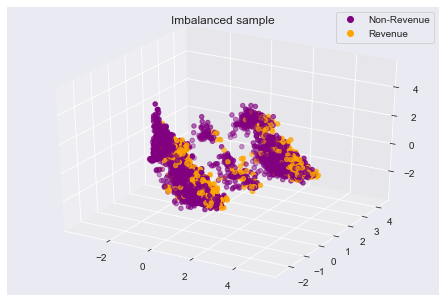

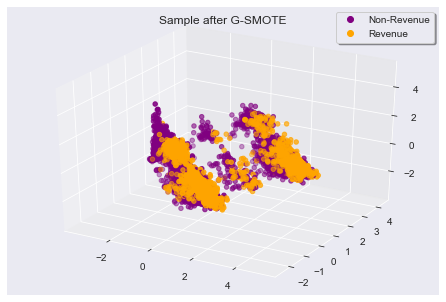

In [42]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
def three_d_scat(X,y, resampler, resample_name, col):
    '''function that returns two 3-d scatterplots. One 
    for the imbalanced set  and one after the balancing'''
    #first create the imbalanced plot
    #We can only plot the data in a scatterplot if we reduce the dimensions to 3 with PCA
    pca = PCA(n_components= 3)
    X = pca.fit_transform(X)
    #turn y.frame to numpy
    y_scat =  y.to_numpy()
    y_scat = y_scat.reshape(len(y_scat,))
    #make the plot
    fig = plt.figure()
    ax = Axes3D(fig)
    # separate the columns 
    x = X[:,0]
    y = X[:,1]
    z = X[:,2]
    c= y_scat
    cat = ['Non-Revenue', 'Revenue']
    scatter1 = ax.scatter(x,y,z,c=c, cmap = col)
    plt.title('Imbalanced sample')
    plt.legend(handles=scatter1.legend_elements()[0], labels=cat)


    # now create the balanced plot
    xsmote,ysmote=resampler.fit_resample(X,y_scat)
    fig = plt.figure()
    ax = Axes3D(fig)
    x = xsmote[:,0]
    y = xsmote[:,1]
    z = xsmote[:,2]
    c= ysmote
    cat = ['Non-Revenue', 'Revenue']
    scatter2 = ax.scatter(x,y,z,c=c, cmap = col)
    plt.title('Sample after'+ ' '+ resample_name )
    plt.legend(loc='upper right',
          fancybox=True, shadow=True,handles=scatter2.legend_elements()[0], labels=cat)
    return scatter1, scatter2
    

three_d_scat(xgb_train,y_train,GeometricSMOTE(sampling_strategy=.340, random_state = 123), 'G-SMOTE',ListedColormap(['purple','orange']))


# Support Vector Machine with G-SMOTE oversampling:

In [43]:
##### implementation of SVM with geomteric smote
gsmote = GeometricSMOTE(sampling_strategy=.273, random_state = 122)

# Support vector machine after oversampling
xsmote,ysmote = gsmote.fit_resample(svm_train,y_train)
svc = SVC(C = 1, random_state = 122)

svc = svc.fit(xsmote,ysmote.values.ravel()) 
ypred_train =svc.predict(xsmote)
ypred_test = svc.predict(svm_test)
print('Support Vector Machine')
print()

print('SVM with oversampling Test Precision: %.4f'%precision_score(y_test,ypred_test))
print('SVM with oversampling Test Recall: %.3f'%recall_score(y_test,ypred_test))
print('SVM with oversampling Test f1 score:%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3))
precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
auc_precision_recall = auc(recall, precision)
print('SVM with oversampling Test auc_precision_recall: %.3f'% auc_precision_recall)

Support Vector Machine

SVM with oversampling Test Precision: 0.7037
SVM with oversampling Test Recall: 0.753
SVM with oversampling Test f1 score:0.734
SVM with oversampling Test auc_precision_recall: 0.747


In [44]:
#initialize some C values for optimization
params =  {'C': [ 1, 10, 100],
            'kernel': ['rbf'],
           }
          
# perform  search 
rand = RandomizedSearchCV(svc, param_distributions = params,cv=3, n_jobs=2,scoring = fbeta).fit(xsmote, ysmote.values.ravel())
print('Optimal parameters:', rand.best_params_)

svc=SVC(**rand.best_params_,random_state=123)

svc = svc.fit(xsmote,ysmote.values.ravel()) 
ypred_train =svc.predict(xsmote)
ypred_test = svc.predict(svm_test)
print()
print('SVM with resampling:')
print()
svm_resampled_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
print('Test Precision:', svm_resampled_prec)
svm_resampled_rec = '%.3f'%recall_score(y_test,ypred_test).round(2)
print('Test Recall:', svm_resampled_rec)
svm_resampled_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
print('Test fbeta score:', svm_resampled_Fbeta)
precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
svm_resampled_pr_auc = '%.3f' %auc(recall, precision).round(2)
print('Test Precision Recall auc:', svm_resampled_pr_auc)

Optimal parameters: {'kernel': 'rbf', 'C': 1}

SVM with resampling:

Test Precision: 0.700
Test Recall: 0.750
Test fbeta score: 0.730
Test Precision Recall auc: 0.750


The undersampled model SVM model had very similar performance to the class weighted SVM with threshold tuning. In fact, the only difference is 1 unit drop on precision for the undersampled model.

## Visualization of the impact of Gsmote in the majority class:
Below, the impact of Gsmote of the revenue minority class is shown. It is evident that a relative balance between the two classes has been achieved as exhibited on  the second  3D-plot.

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f8fd12f5080>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f9021558710>)

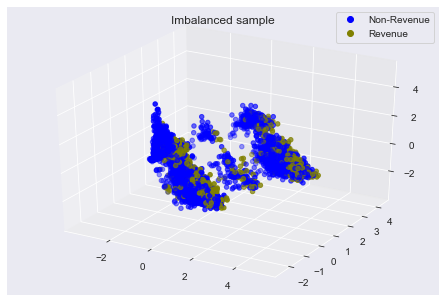

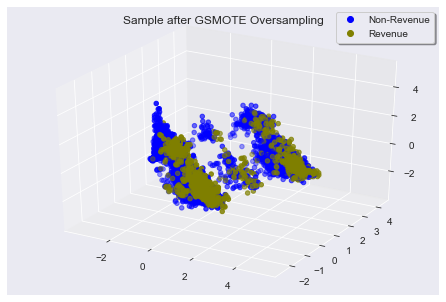

In [45]:
three_d_scat(svm_train,y_train, GeometricSMOTE(sampling_strategy=.273, random_state = 122), 'GSMOTE Oversampling', ListedColormap(['blue','olive'])) 

## Logistic Regression with Near Miss:
Next we will implement the Near Miss undersampling technique which optimizes our score of interest for Logistic Regression. Near Miss finds pairs of datapoints that are separated by small distance and belong to the oposite classes and eliminates the one from the majority class.

In [46]:
##### Logistic regression with Gsmote
near_miss= NearMiss(sampling_strategy = 0.37)


lr = LogisticRegression(C = 1,solver = 'liblinear' , penalty = 'l2', random_state = 126)
xsmote,ysmote=near_miss.fit_resample(lr_train,y_train)
#lr = LogisticRegression(C=0.1, penalty = 'l1', solver = 'liblinear')
lr.fit(xsmote ,ysmote.values.ravel())
ypred_train =lr.predict(xsmote)
ypred_test = lr.predict(lr_test)

print('SVM with gsmote Test Precision:',precision_score(y_test,ypred_test))
print('SVM with gsmote Test Recall:',recall_score(y_test,ypred_test))
print('SVM with gsmote Test f1 score:',fbeta_score(y_test,ypred_test, beta= 1.3))
precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)


SVM with gsmote Test Precision: 0.7450980392156863
SVM with gsmote Test Recall: 0.6951219512195121
SVM with gsmote Test f1 score: 0.712897526501767
0.7436837811676227


In [47]:
#params optimization
params = {'solver': ['liblinear'],
        'penalty' : [ 'l2', 'l1'],
          'C':[1,2,3,4,5]}
rand = RandomizedSearchCV(lr, param_distributions = params,cv=10,scoring = fbeta).fit(xsmote, ysmote.values.ravel())
print('Optimal parameters:', rand.best_params_)

#store the optimized parameters in the Logisti Rgression classifier
lr=LogisticRegression(**rand.best_params_)

lr = lr.fit(xsmote,ysmote.values.ravel()) 
ypred_train =lr.predict(xsmote)
ypred_test = lr.predict(lr_test)
print()
print('Logistic Regression with resampling:')
print()
lr_resampled_prec = '%.3f'%precision_score(y_test,ypred_test).round(2)
print('Test Precision:', lr_resampled_prec)
lr_resampled_rec = '%.3f'%recall_score(y_test,ypred_test).round(2)
print('Test Recall:', lr_resampled_rec)
lr_resampled_Fbeta = '%.3f'%fbeta_score(y_test,ypred_test, beta= 1.3).round(2)
print('Test fbeta score:', lr_resampled_Fbeta)
precision, recall, thresholds = precision_recall_curve(y_test,ypred_test)
lr_resampled_pr_auc = '%.3f' %auc(recall, precision).round(2)
print('Test Precision Recall auc:', lr_resampled_pr_auc)

Optimal parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

Logistic Regression with resampling:

Test Precision: 0.750
Test Recall: 0.700
Test fbeta score: 0.710
Test Precision Recall auc: 0.740


Undersampling with Logistic Regression resulted to an elevated precision(0.75) and decrease of .06 in recall compared to the threshold tunning with the same algorithm. However, as mentioned earlier, this is not desirable in our case as we believe that correct identification of true positives is more critical high precision(identifying true negatives).

## Visualization of Near Miss Undersampling impact imbalanced dataset:

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f9010a169b0>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f9010989dd8>)

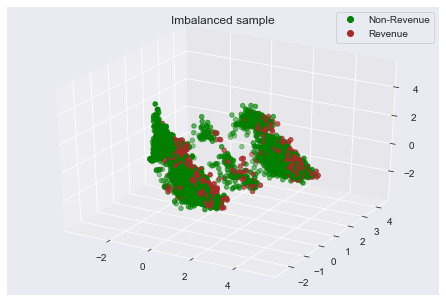

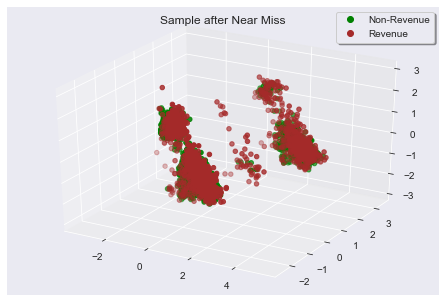

In [48]:
three_d_scat(lr_train,y_train,NearMiss(sampling_strategy = 0.37), 'Near Miss', ListedColormap(['green','brown'])) 

In [49]:
# df with resapled models scores 
df2_scores=pd.DataFrame({'Model': ['XGboost/SmoteTomek', 'SVM/Random Undersampling', 'Logistic Regression/G-SMOTE'], 
                'Recall' : [xgb_resampled_rec, svm_resampled_rec ,lr_resampled_rec],
                'Precision' : [xgb_resampled_prec,svm_resampled_prec ,lr_resampled_prec],
                'Fbeta' : [xgb_resampled_Fbeta,svm_resampled_Fbeta ,lr_resampled_Fbeta],
                'PR AUC score' : [xgb_resampled_pr_auc, svm_resampled_pr_auc,lr_resampled_pr_auc]})
#concatenation with the other scores df
df_scores = df_scores.append(df2_scores)

## Summary of the models performance:

In [50]:
df_scores

,Model,Recall,Precision,Fbeta,PR AUC score
0,Base XGboost,0.550,0.730,0.610,0.680
1,Base Logistic Regression,0.640,0.740,0.670,0.720
2,Base Weighted SVM,0.770,0.700,0.740,0.750
0,Threshold Tuned XGboost/PCA,0.810,0.580,0.708,0.710
1,Threshold Tuned Logistic Regression/PCA,0.770,0.700,0.740,0.750
2,Threshold Tuned Weighted SVM/PCA,0.790,0.670,0.740,0.750
0,XGboost/SmoteTomek,0.670,0.700,0.680,0.710
1,SVM/Random Undersampling,0.750,0.700,0.730,0.750
2,Logistic Regression/G-SMOTE,0.700,0.750,0.710,0.740
